# <center>CS559 - Lecture 9: Unsupervised Learning I: Clustering Analysis </center>
## <center> KMeans and Mixtures of Gaussians </center>

<p><a name="Outline"></a></p>

# Outline
* Introduction to Unsupervised Learning
* Cluster Analysis
    1. KMeans 
    2. Gaussian Mixture

<p><a name="Introduction to Unsupervised Learning"></a></p>

# 9.1. Introduction to Unsupervised Learning
- Only a set of $N$ observations with $p$ features w/o names and/or no reponse (or target) variable.
    - Unfortunately, unlabeled data which is much easier to obtain...
    - Such data set possesses a limitation of working/handling techniques...
- Instead of implementing a model, we rather want to infer the properties directly without knowing the "correct answers or the error for each observation. 
    - "<b>Learning Without Teacher</b>" - No direct measurements of success or feedbacks
    - Therefore, unsupervised learnings are more subjective than supervised learnings.
- Two approaches:
    - **Clustering**: a broad class of methods for grouping or segmenting a collection of objects into distinct subjects known as **clusters**.
        - example: groups of online shoppers characterized by their browsing and purchase histories.
    - **Dimension Reduction**: a method to reduce the dimension of data while keeping the most of information. 
        - often used for data visualization or data preprocessing for supervised learning.

# 9.2. Cluster Analysis
- Task: aim to uncover <b>underlying structure</b> of the data and see what pattern exists in the data. 
    - We aim to group together observations that are similar while separating observations that are dissimilar. 
- Cluster analysis attempts to explore possible subpopulations that exist within your data.
- Typical questions that cluster analysis attempts to answer are: 
    - Approximately how many subgroups exist in the data? 
    - Approximately what are the sizes of the subgroups in the data? 
    - What commonalities exist among members in similar subgroups? 
    - Are there smaller subgroups that can further segment current subgroups? 
    - Are there any outlying observations? 
        - Notice that these questions are largely exploratory in nature. 
        
## 9.3 K-means Clustering
### 9.3.1. Motivation
- With the KMeans clustering algorithm, we aim to split up our observations into a predetermined number of clusters.
    - The number of clusters K must be specified in advance.
    - These cluster memberships are distinct and non-overlapping.
- The data points in each of the clusters are determined to be mostly similar to a specific centroid value:
    - The centroid of a cluster represents the average of the observations within a given cluster; it is a single theoretical center that represents the prototypical member that exists within the given cluster. 
    - Each observation will be assigned to exactly one of the K clusters depending on where the observation falls in the feature space relative to the cluster centroid locations. 

In [1]:
from sklearn import datasets
import pandas as pd
import numpy as np

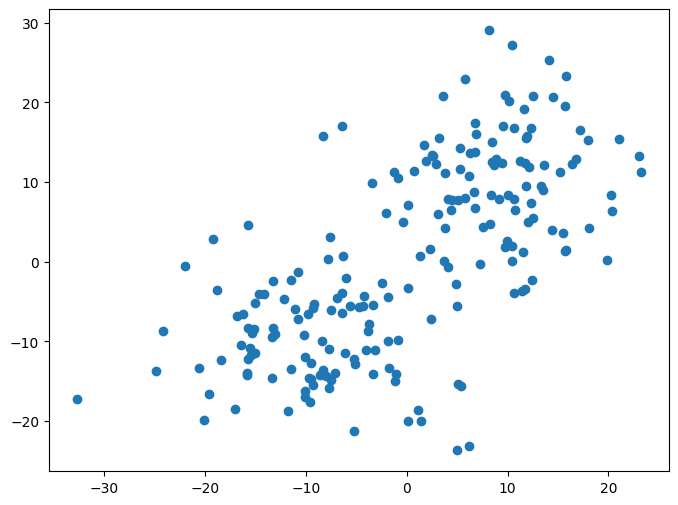

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 8, 6
np.random.seed(42)
x1 = np.random.randn(100, 2) * 7 + 10 
x2 = np.random.randn(100, 2) * 7 - 10 
x = np.row_stack([x1, x2])
plt.scatter(x[:, 0], x[:, 1])
plt.show()

- A simulated data set with 200 observation in 2-dimensional space.

In [3]:
from sklearn.cluster import KMeans

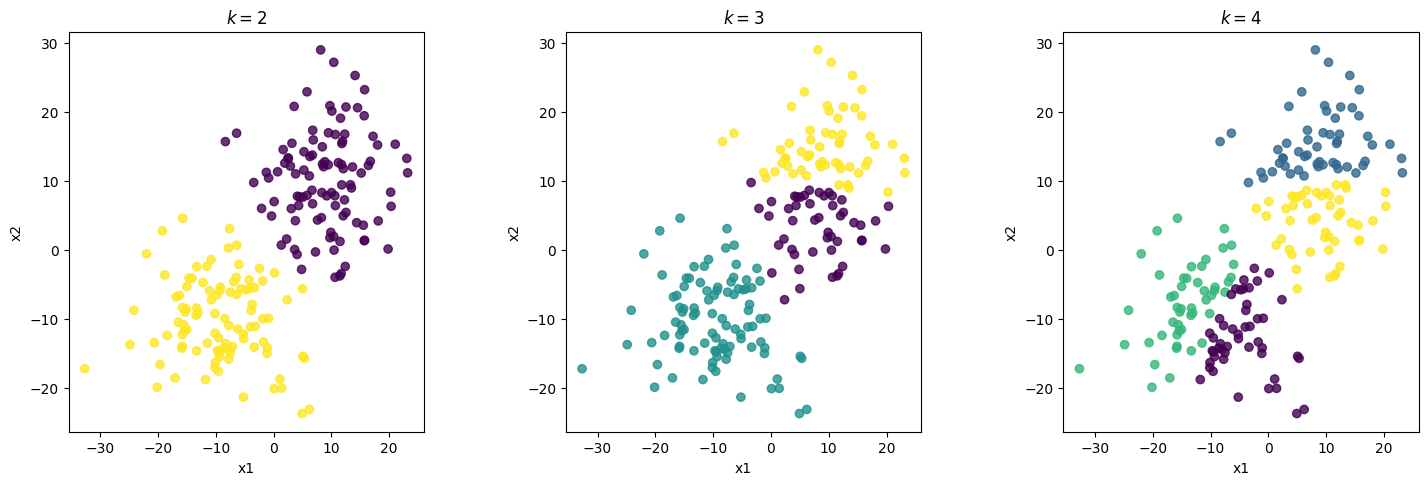

In [4]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5))
for i,ax in zip(range(2,5),[ax1, ax2, ax3]):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(x)
    ax.scatter(x[:, 0], x[:, 1],c=kmeans.labels_, alpha=0.8)
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_title('$k=$'+str(i))
plt.subplots_adjust(left=0.1,bottom=0.1,right=1,top=0.9,wspace=0.4,hspace=0.4)
plt.show()

- The color labels the cluster to which it has been assigned. Note that the cluster coloring is arbitrary since there is no absolute ordering of the clusters. 

### 9.3.2. Mathematical Understanding of K-means
- Now the main question: what technique does k-means algorithm use to create these clusters? 
    - Suppose we use the **Euclidean** distance 
    $$D(\vec{q},\vec{p})=\sqrt{\sum_{i=1}^N(q_i-p_i)^2}.$$ 
    - Then the **within-cluster variation** $W(C_k)$ is defined as: 
    
    \begin{equation*}
        W(C_k)=\frac{1}{|C_k|}\sum_{i,i'\in C_k}\sum_{j=1}^p (x_{ij}-x_{i'j})^2 \label{eq:withinclustervar} \tag{9-1}
    \end{equation*}
    where 
        - $C_k$ is the total number of observations in cluster $k$
        - $i,i'\in C_k$ are indices of observations in cluster $C_k$
        - $p$ is the number of variables/features in dataset.
- Since the within-cluster variation is a quantitative gauge of the amount by which the observations in a specific cluster differ from one another, we want to ***minimize*** the sum of this quantity $W(C_k)$ in Eq. $\eqref{eq:withinclustervar}$ over all clusters: 
    \begin{equation*}
        \min_{C_1,\dots,C_k}\Big\{\sum_{i=1}^k W(C_i)\Big\}
        \label{eq:minWc} \tag{9-2}
    \end{equation*}
- In Eq. $\eqref{eq:minWc}$, we would like to partition the observations into $K$ clusters such that the total within-cluster variation aggregated across all $K$ clusters is as small as possible; the optimization problem for K-means is as follows:
    \begin{equation*}
        \min_{C_1,\dots,C_k}\Big\{\sum_{i=1}^k \frac{1}{|C_k|}\sum_{i,i'\in C_k}\sum_{j=1}^p (x_{ij}-x_{i'j})^2\Big\}
        \label{eq:totalWC}\tag{9-3}
    \end{equation*}
- Finding the global minimum of Eq. $\eqref{eq:totalWC}$ is very difficult.
- In practice, most K-means packages perform the following greedy algorithm, also known as Lloyd algorithm in the computer science circle.

### 9.3.3. K-means Algorithm

    
1. Randomly assign  an integer label, from 1 to K (where K is the number of clusters), to each of the observations. These serve as initial cluster assignments for the observations. 
2. Iterate until the cluster assignments stop changing:
    1. For each of the K clusters, compute the cluster’s new centroid. 
    2. Assign each observation to the cluster whose centroid is closest (closest is measured using Euclidean distance). 

In [5]:
np.random.seed(123)
x3 = np.random.randint(2, size=len(x))
x=pd.DataFrame(np.column_stack([x,x3]))
x.columns=['x','y','cluster']

In [6]:
len(x[x['cluster']==0])

102

In [7]:
print(f'{x.shape}')

(200, 3)


In [8]:
x0=x[x['cluster']==0]
x1=x[x['cluster']==1]
print(f'the number of cluster id 0 is {len(x0)}')
print(f'the number of cluster id 0 is {len(x1)}')

the number of cluster id 0 is 102
the number of cluster id 0 is 98


In [9]:
x0_cx, x0_cy = x0['x'].mean(), x0['y'].mean()
x1_cx, x1_cy = x1['x'].mean(), x1['y'].mean()
print(f'the center of cluster=0 is {round(x0_cx,2),round(x0_cy,2)}')
print(f'the center of cluster=1 is {round(x1_cx,2),round(x1_cy,2)}')

the center of cluster=0 is (1.08, 0.63)
the center of cluster=1 is (-1.03, -0.1)


In [10]:
cluster0, cluster1 = 0, 0
cx0, cy0 = [], []
cx1, cy1 = [], []
for index,row in x0.iterrows():
    distance0 = np.sqrt((row['x']-x0_cx)**2+(row['y']-x0_cy)**2)
    distance1 = np.sqrt((row['x']-x1_cx)**2+(row['y']-x1_cy)**2)
    if distance0<=distance1:
        cluster0 = cluster0+1
        cx0.append(row['x'])
        cy0.append(row['y'])
    else:
        cluster1 = cluster1+1
        cx1.append(row['x'])
        cy1.append(row['y'])
print(f'the new cluster=0 number is {cluster0}.')
print(f'the new cluster=0 center is {round(np.mean(cx0),2),round(np.mean(cy0),2)}.')
print(f'the new cluster=1 number is {cluster1}.')
print(f'the new cluster=0 center is {round(np.mean(cx1),2),round(np.mean(cy1),2)}.')

the new cluster=0 number is 54.
the new cluster=0 center is (10.18, 10.0).
the new cluster=1 number is 48.
the new cluster=0 center is (-9.17, -9.91).


In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
ax1.scatter(x0['x'],x0['y'])
ax1.scatter(x0_cx, x0_cy,marker='.',s=300,label='original center for 0')
ax1.scatter(x1_cx, x1_cy,marker='.',s=300,label='original center for 1')
ax1.legend()

ax2.scatter(cx0,cy0)
ax2.scatter(cx1,cy1)
ax2.scatter(np.mean(cx0), np.mean(cy0),marker='+',s=300,label='new center for 0')
ax2.scatter(np.mean(cx1), np.mean(cy1),marker='+',s=300,label='new center for 1')
ax2.legend()
plt.show()

In [12]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5))
np.random.seed(42)
x1 = np.random.randn(100, 2) * 7 + 10 
x2 = np.random.randn(100, 2) * 7 - 10 
x=np.row_stack([x1,x2])
x=pd.DataFrame(x)
x.columns=['x','y']
ax1.scatter(x['x'], x['y'])
ax1.set_title('1. Data')

np.random.seed(123)
L=4
x3 = np.random.randint(L, size=len(x))
x=pd.DataFrame(np.column_stack([x,x3]))
x.columns = ['x','y','label']



x_mean=x.groupby('label').mean()
x_mean.reset_index(inplace=True)

for l,color in zip(range(0,L),['blue','red','green','yellow']):
    ax2.scatter(x['x'][x['label']==l], x['y'][x['label']==l],alpha=0.5,color=color,label='label'+str(l))
    ax2.legend()
    ax2.set_title('2. Random Label Initialization')
    ax3.scatter(x['x'][x['label']==l], x['y'][x['label']==l],alpha=0.5,color=color,label='label'+str(l))
    ax3.scatter(x['x'][x['label']==l].mean(),x['y'][x['label']==l].mean(), marker="o", 
                s=300,alpha=1,color=color,edgecolor='black')
    ax3.legend()
ax3.set_title('3. Centroids with the initial labels')
plt.subplots_adjust(left=0.1,bottom=0.1,right=1,top=0.9,wspace=0.4,hspace=0.4)
plt.show()

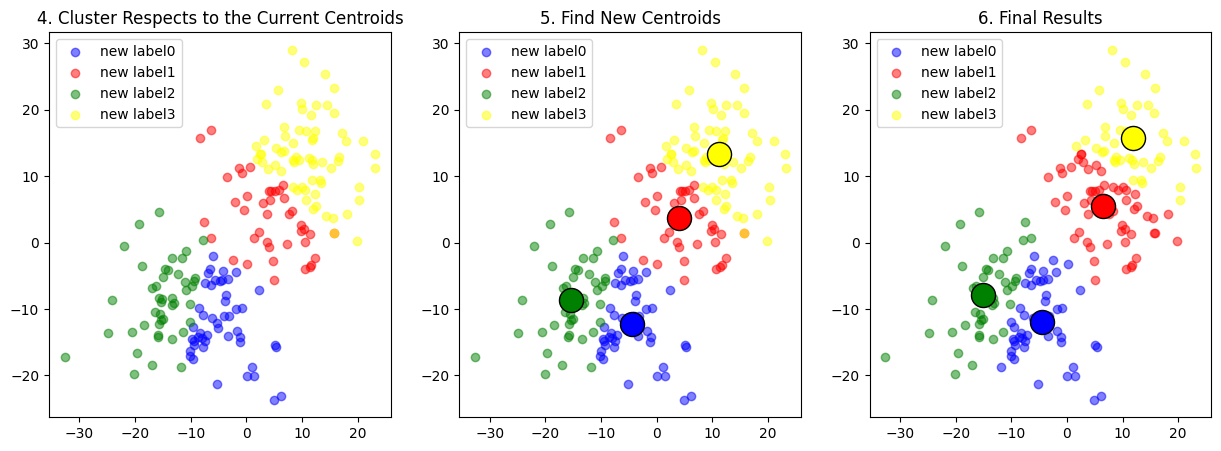

In [13]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5))
kmeans = KMeans(n_clusters=L,random_state=0,n_init=1,max_iter=1)
kmeans.fit(x[['x','y']])
x['newlabel']=kmeans.labels_
x['newlabel'].replace({3:1,0:2,2:0,1:3},inplace=True)
for l,color in zip(range(0,L),['blue','red','green','yellow']):
    ax1.scatter(x['x'][x['newlabel']==l], x['y'][x['newlabel']==l],alpha=0.5,color=color,label='new label'+str(l))
    ax1.legend()
    ax1.set_title('4. Cluster Respects to the Current Centroids')

    ax2.scatter(x['x'][x['newlabel']==l], x['y'][x['newlabel']==l],alpha=0.5,color=color,label='new label'+str(l))
    ax2.scatter(x['x'][x['newlabel']==l].mean(),x['y'][x['newlabel']==l].mean(), marker="o", 
            s=300, color=color,alpha=1,edgecolors='black')
    ax2.set_title('5. Find New Centroids')
    ax2.legend()

kmeans = KMeans(n_clusters=L,random_state=0,n_init=1,max_iter=10)
kmeans.fit(x[['x','y']])
x['newlabel']=kmeans.labels_
x['newlabel'].replace({3:1,0:2,2:0,1:3},inplace=True)

for l,color in zip(range(0,L),['blue','red','green','yellow']):
    ax3.scatter(x['x'][x['newlabel']==l], x['y'][x['newlabel']==l],alpha=0.5,color=color,label='new label'+str(l))
    ax3.scatter(x['x'][x['newlabel']==l].mean(),x['y'][x['newlabel']==l].mean(), marker="o", 
            s=300, color=color,alpha=1,edgecolors='black')
    ax3.set_title('6. Final Results')
    ax3.legend()

plt.show()

### 9.3.4. KMeans Optimization

- The KMeans procedure always converges:
    1. If you run the algorithm from a fixed initial assignment, it will reach a stable endpoint where the clustering solution will no longer change through the iterations. 
    2. Unfortunately, the guaranteed convergence is to a local minimum. 
        - Thus, if we begin the KMeans algorithm with a different initial configuration, it is possible that convergence will find different centroids and therefore ultimately assigning different cluster memberships. 
- What can we do to get around this?
    - Run the KMeans procedure several times and pick the clustering solution that yields the smallest aggregate within-cluster variance. 
- The Kmeans++ (2007) improves the random seeding of the original KMeans.
    1. The initialization step runs inductively.
    2. Firstly, pick a data point randomly as the first centroid.
    3. Suppose that k of the seed centroid have been chosen, compute for each data point x the distance $D(x)$ to the closest centroid among these k seed centroids. Select the $(k+1)^{th}$ centroid randomly, according to a probability distribution with probability proportional to $D(x)^2$.
    4. In each inductive step, the newly found seed centroid trends to keep a far distance from the existing ones.
    5. The algorithm will stop when it has found the least/best (local optimum) value. 
- The default initialization scheme of Scikit-Learn’s KMeans uses KMeans++. 

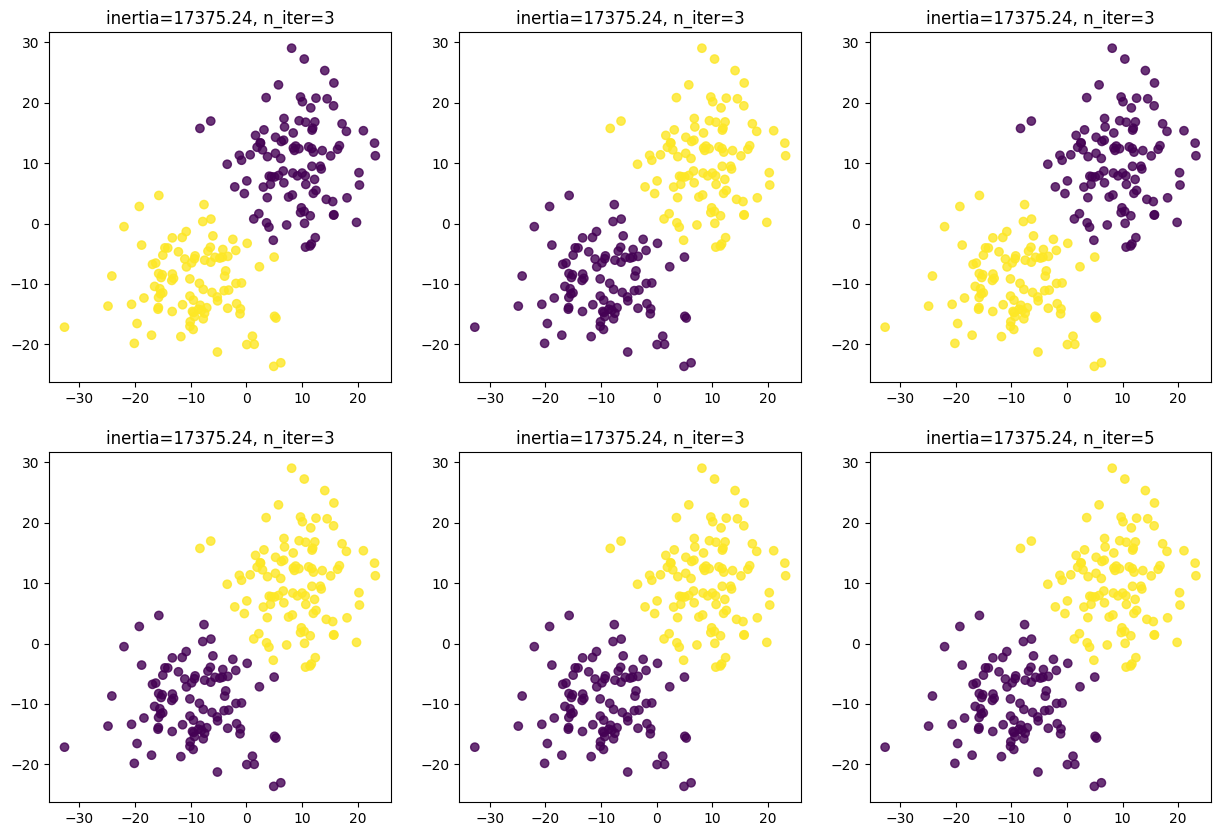

In [14]:
x=np.row_stack([x1,x2])
ax1.scatter(x[:,0], x[:,1])
ax1.set_title('1. Data')

np.random.seed(123)
L=2
x3 = np.random.randint(L, size=len(x))
x=pd.DataFrame(np.column_stack([x,x3]))
x.columns = ['x','y','label']

fig, axs = plt.subplots(2, 3, figsize=(15,10))
max_iter = 10
n_init=1
for i in range(0,2):
    for j in range(0,3):
        n_init=np.random.randint(n_init,5)
        max_iter = np.random.randint(max_iter,100)
        kmeans = KMeans(n_clusters=2,n_init=n_init,max_iter=max_iter)
        kmeans.fit(x[['x','y']])
        axs[i,j].scatter(x['x'],x['y'],c=kmeans.labels_,alpha=0.8)
        axs[i,j].set_title('inertia='+str(round(kmeans.inertia_,2))+', n_iter='+str(kmeans.n_iter_))
plt.show()

### 9.3.5. $K$-value Determination

In [15]:
def plot_inertia(km, X, n_cluster_range):
    inertias = []
    for i in n_cluster_range:
        km.set_params(n_clusters=i)
        km.fit(X)
        inertias.append(km.inertia_)
    plt.plot(n_cluster_range, inertias, marker='o')
    plt.title('Elbow method')
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')
    plt.show()

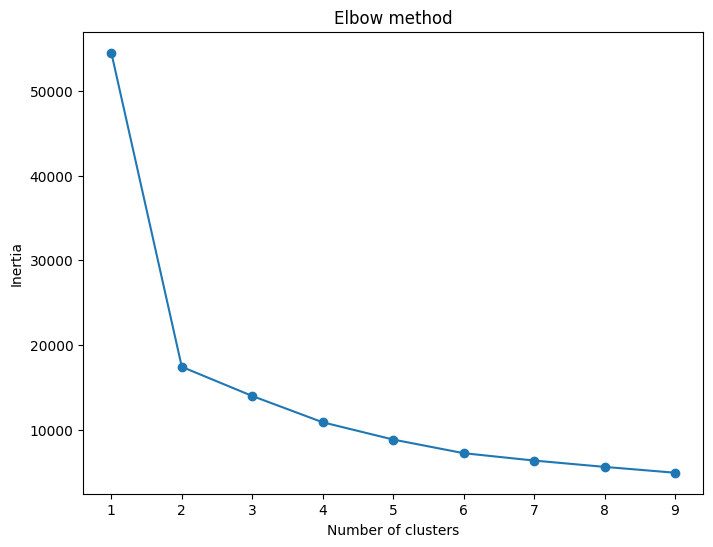

In [16]:
plot_inertia(KMeans(), x, range(1,10))

### 9.3.6. `sklearn` KMeans

In [17]:
from __future__ import print_function
from sklearn.cluster import KMeans
kmeans = KMeans()

**Arguments**:
- n_clusters: The number of clusters to divide, default is 8.
- max_iter: The maximal number of iterations, default is 300.
- n_init: Number of time the k-means algorithm will run with different centroid seeds. The final results will be the best output of n_init consecutive runs in terms of inertia. default is 10.
- init: Method for initialization, defaults to 'k-means++'. Other options are 'random' or an ndarray of shape (n_clusters, n_features) and gives the initial centers.
- random_state: Optional. The generator used to initialize the centers. If an integer is given, it fixes the seed. Defaults to the global numpy random number generator.
Usually, we just need to set the argument n_clusters to determine how many groups are we going to split.

**Attributes**:
- cluster_centers_: The coordinates of cluster centers.
- labels_: Labels of each observation, which indicate the group number of each observation.
- inertia_: Sum of distances of samples to their closest cluster center.

The most import attribute here is the labels_ .

**Methods**:
- fit: Fit k-means clustering on a given data set.
- fit_predict: Compute cluster centers and predict cluster index for each sample.
- get_params: Get parameters for this estimator.
- set_params: Set the parameters of this estimator.
- predict: Given a set of data, predict the closest cluster each sample belongs to.

#### `sklearn` Example

In this case, we try to split the iris data into multiple groups by using the features sepal length, sepal width, petal length, petal width.
- Set the argument n_clusters to 3.
- Fit the iris data.

In [18]:
from sklearn import datasets
iris = datasets.load_iris()

In [19]:
kmeans = KMeans()

In [20]:
plot_inertia(kmeans, iris.data, range(1, 10))

In [21]:
kmeans.set_params(n_clusters=3)
kmeans.fit(iris.data)

KMeans(n_clusters=3)

- The label of each observation.

In [22]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2], dtype=int32)

- The centroid of each cluster:

In [23]:
kmeans.cluster_centers_

array([[5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097]])

In [24]:
import  matplotlib.pyplot as plt
plt.scatter(iris.data[:, 2], iris.data[:, 3], c=kmeans.labels_, alpha=0.8)
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:, 3], marker="+", s=1000, c=[0, 1, 2])
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.show()

In [25]:
plt.scatter(iris.data[:, 0], iris.data[:, 1], c=kmeans.labels_, alpha=0.8)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker="+", s=1000, c=[0, 1, 2])
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

- The big markers "+" refers to the centroid of each cluster.
- We can also fit the principal components to the KMeans algorithm. Perform K means on the new dataset below, and then find the centers and the labels.

In [26]:
from matplotlib import cm
from sklearn.metrics import silhouette_samples
import numpy as np

def plot_silhouette(km, x):
    y_km = kmeans.fit_predict(x)
    cluster_labels = np.unique(y_km)
    n_clusters = cluster_labels.shape[0]
    silhouette_vals = silhouette_samples(x, y_km, metric='euclidean')
    y_ax_lower, y_ax_upper = 0, 0
    yticks = []
    for i, c in enumerate(cluster_labels):
        # Aggregate the silhouette scores for samples belonging to
        # cluster c, and sort them
        c_silhouette_vals = silhouette_vals[y_km == c]
        c_silhouette_vals.sort()

        size_cluster_c = len(c_silhouette_vals)
        y_ax_upper += size_cluster_c
        color = cm.jet(i*1.0/n_clusters)
        plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, color=color)

        # Compute the new y_ax_lower for next plot
        yticks.append((y_ax_lower + y_ax_upper) / 2)
        y_ax_lower += size_cluster_c

    # The vertical line for average silhouette score of all the values
    silhouette_avg = np.mean(silhouette_vals)
    plt.axvline(silhouette_avg, color='red', linestyle='--')

    plt.yticks(yticks, cluster_labels + 1)
    plt.title('Silhouette Analysis')
    plt.ylabel('Cluster')
    plt.xlabel('Silhouette coefficient')
    plt.show()

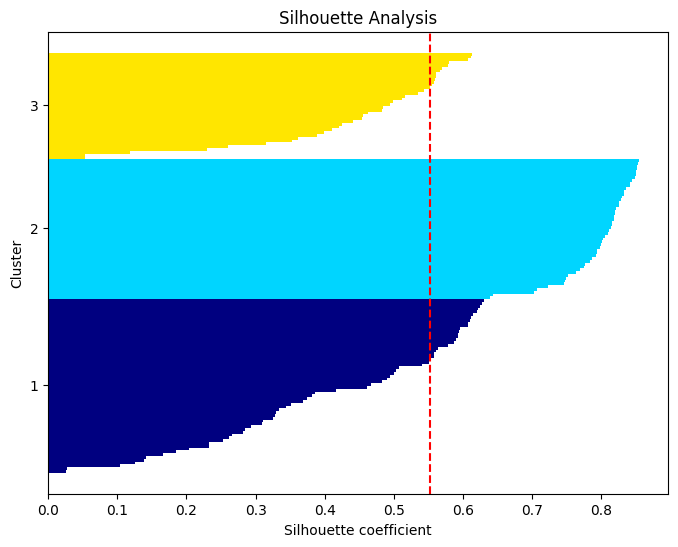

In [27]:
kmeans.set_params(n_clusters=3)
plot_silhouette(kmeans, iris.data)

- The silhouette value is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation). The silhouette ranges from −1 to +1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.
- If most objects have a high value, then the clustering configuration is appropriate. If many points have a low or negative value, then the clustering configuration may have too many or too few clusters.

### 9.3.7 Summary of K-means
K-means clustering algorithms require:
1. the choice of the number of classes to be clustered, 
2. a starting cluster configuration assignment. 
3. In most cases, this is hard to determine. 

#### Strengths
- Use simple principles for identifying clusters which can be explained in non-statistical terms.
- It is fairly efficient and performs well at dividing the data into useful clusters.

#### Weaknesses
- It is less sophisticated than more recent clustering algorithms.
- Because it uses initial random choice, it is not guaranteed to find the optimal set of clusters.
- Require a reasonable guess for how many clusters naturally exist in the data.


## 9.4. Gaussian Mixture (GM)

### 9.4.1. GM Description

A Gaussian Mixture is a function that is comprised of several Gaussians, each identified by $k\in{1,\dots, K}$, where $K$ is the number of clusters of our dataset. Each Gaussian $k$ in the mixture is comprised of the following parameters:

- A mean $\mu$ that defines its center.
- A covariance $\Sigma$ that defines its width. This would be equivalent to the dimensions of an ellipsoid in a multivariate scenario.
- A mixing probability $\pi$ that defines how big or small the Gaussian function will be.

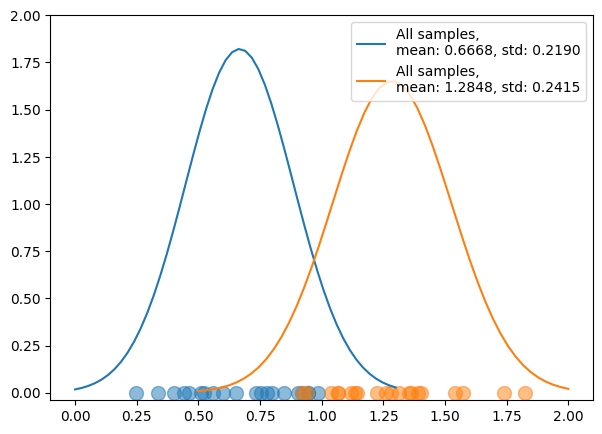

In [28]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt


N = int(20)
np.random.seed(168)

X = np.array(sorted(np.random.rand(N)))
Y = np.array(sorted(np.random.rand(N)))+0.9

plt.figure(figsize=(7, 5))
plt.ylim(-0.04, 2)

my_normX = stats.norm(np.mean(X), np.std(X)).pdf
labelX = 'All samples,\nmean: %.4f, std: %.4f' % (np.mean(X), np.std(X))
plt.plot(np.linspace(0, 1.3), my_normX(np.linspace(0, 1.3)), label=labelX)
my_normY = stats.norm(np.mean(Y), np.std(Y)).pdf
labelY = 'All samples,\nmean: %.4f, std: %.4f' % (np.mean(Y), np.std(Y))
plt.plot(np.linspace(0.5, 2.0), my_normY(np.linspace(0.5, 2.0)), label=labelY)
plt.scatter(X,[0]*N,alpha=0.5,s=100)
plt.scatter(Y,[0]*N,alpha=0.5,s=100)
plt.legend(loc='upper right')
plt.show()

* The mixing coefficients are themselves probabilities and must meet this condition:

$$\sum_{k=1}^K \pi_k = 1\,\,\,\,{\rm and}\,\,\,\,\pi_k\ge0\, \forall k$$

* The general Gaussian distribution for multi-variable is expressed below:
\begin{equation*}
\mathcal{N}({\bf x}|\mu,\Sigma)=\frac{1}{2^{D/2}|\Sigma|^{1/2}}\exp{\Big(-\frac{1}{2}({\bf x}-\mu)^T\Sigma^{-1}({\bf x}-\mu)\Big)}
\label{eq:GD}\tag{9-5}\\
\end{equation*}
\begin{equation*}
\ln{\mathcal{N}({\bf x}|\mu,\Sigma)}=-\frac{D}{2}\ln 2\pi -\frac{1}{2}\ln\Sigma-\frac{1}{2}({\bf x}-\mu)^T\Sigma^{-1}({\bf x}-\mu)
\label{eq:logGD}\tag{9-6}
\end{equation*}
where $\eqref{eq:logGD}$ is the log of $\eqref{eq:GD}$ and it is much easier to handle analytically and computationally. In both $\eqref{eq:GD}$ and $\eqref{eq:logGD}$, $D$ is the number of dimentions, $\mu$ is the mean, and $\Sigma$ is the covariance. 

    * In this example, $D=2$ and $N=20$. Therefore ${\bf x}$ will be a $20\times 2$ matrix, $\mu$ a $1\times 2$ vector, and $\Sigma$ a $2\times 2$ matrix. 

### 9.4.2. Mathematics

1. Gaussian mixture model (GMM) is a density estimator and represents a distribution as 
\begin{equation*}
p({\bf x})=\sum_{k=1}^K \pi_k \mathcal{N}({\bf x}|\mu_k,\Sigma_k)
\label{eq:gmm}\tag{9-7}
\end{equation*}

2. We can find parameters $\Theta = \{\pi_k,\mu_k,\Sigma_k\}$ using log maximum likelihood estimation by taking a derivative of $p({\bf x})$ with respect to $\Theta$,
\begin{equation*}
\ln{p({\bf x|\pi,\mu,\Sigma})}=\sum_{n=1}^N\ln{\Big(\sum_{k=1}^K \pi_k \mathcal{N}({\bf x}|\mu_k,\Sigma_k)\Big)}
\end{equation*}
- Arbitrarily large likelihood when a Gaussian explains a single point.
- Solution is up to permutations. 
- The finding the optimized $\Theta$ is not easy. 

3. To overcome, let $z\in\{0,1\}$ be a ***latent variable*** that explains the Gaussian generated observation of ${\bf x}$ with some probability,
$$p(z_{k}=1|{\bf x}_k)=\pi_k$$
and the set of all possible latent variables $z$ is 
$${\bf z}=\{z_1,\dots,z_K\}\,{\rm and}\,p({\bf z})=\prod_{k=1}^K \pi_k^{z_k}.$$

4. The conditional probability of ${\bf x}$ at given ${\bf z}$ is 
\begin{equation*}
p({\bf x}|{\bf z})=\prod_{k=1}^K \mathcal{N}({\bf x}|\mu_k,\Sigma_k)^{z_k}.
\end{equation*}
From the product rule, the joint distribution becomes $p({\bf x}_n)=p({\bf z})p({\bf x}_n|{\bf z})$,
\begin{equation*}
p({\bf x})=\sum_{k=1}^K \pi_k \mathcal{N}({\bf x} | \mu_k , \Sigma_k)
\end{equation*}
and for all observations of ${\bf x}$, 
\begin{equation*}
p({\bf X})=\prod_{n=1}^N \pi_k \sum_{k=1}^K \mathcal{N} ({\bf x} | \mu_k, \Sigma_k )
\label{eq:mle}\tag{9-8}
\end{equation*}


5. The log-likelihood of $\eqref{eq:mle}$, $\mathcal{L}(\pi,\mu,\Sigma)$ becomes
\begin{equation*}
\mathcal{L}=\ln{p({\bf X})} = \sum_{n=1}^N \ln \sum_{k=1}^K \pi_k \mathcal{N}({\bf x}_n|\mu_k,\Sigma_k)\\
= \sum_{n=1}^N \ln{\sum_{z^{(n)}=1}^K p({\bf x}_n|{\bf z}^{(n)}, \mu_{z^{(n)}=1},\Sigma_{z^{(n)}=1})p({\bf z}_n|\pi)}\\
= \sum_{n=1}^N \ln{p({\bf x}_n|{\bf z}^{(n)}; \mu_{z^{(n)}=1},\Sigma_{z^{(n)}=1})} + \ln{p({\bf z}^{(n)}|\pi)}
\label{eq:logLME}\tag{9-9}
\end{equation*}
where the latent variable $z^{(n)}$ is for every observation. 

6. Maximum Likelihood Estimator: by taking a derivative of Eq. $\eqref{eq:logLME}$ w.r.t. $\mu_k$ and $\Sigma_k$ and set equals to 0, $\mu_k$ and $\Sigma_k$ can be obtained as follow,

\begin{equation*}
\mu_k = \frac{\sum_{n=1}^N1_{[z^{(n)}=1]}{\bf x}^{(n)}}{\sum_{n=1}^N 1_{[z^{(n)}=k]}}
\end{equation*}

\begin{equation*}
\Sigma_k = \frac{\sum_{n=1}^N1_{[z^{(n)}=1]}({\bf x}_n-\mu_k)({\bf x}_n-\mu_k)^T}{\sum_{n=1}^N 1_{[z^{(n)}=k]}}.
\end{equation*}

7. Using the solutions, $\pi_k$ is $\frac{1}{N}\sum_{n=1}^N 1_{[z^{(n)}=k]}$


### 9.4.3. Expectation Maximization algorithm

* The GMM uses the **Expectation Maximization algorithm** which alternates between two steps. 
    * **E-step**: Compute the posterior probability that each Gaussian generates each datapoint as it is unknown. 
         * Solve the inference problem: Which Gaussian generated which point? 
         * Consider the all possibilities,
         \begin{equation*}
         \gamma_{nk}=p({\bf z}_{n}=k|{\bf x}_n;\pi,\mu,\Sigma)
         \label{eq:gamma}\tag{9-10}
         \end{equation*}
         that is a conditional probability of ${\bf z}$ at given ${\bf x}$.
         * Eq. $\eqref{eq:gamma}$ can be found using Bayes' theorem as following,
         \begin{equation*}
         \gamma(z_k)=p(z_k=1|{\bf x})=\frac{p(z_k=1)p({\bf x}|z_k=1)}{\sum_{j=1}^Kp(z_j=1)p({\bf x}|z_j=1)}
         =\frac{\pi_k\mathcal{N}({\bf x}|\mu_k,\Sigma_k)}{\sum_{j=1}^K\pi_j\mathcal{N}({\bf x}|\mu_j,\Sigma_j)}
         \end{equation*}
    * **M-step**: Change the parameters of each Gaussian to maximize the probability that it would generate that data it is currently responsible for. 
        * Each Gaussian gets a certain amount of posterior probability for each datapoint. 
        * The optimum is
        \begin{equation*}
        \frac{\partial\ln{p({\bf X}|\pi,\mu,\Sigma)}}{\partial\Theta}=0.
        \end{equation*}
        * For $\mu_k$, 
        \begin{equation*}
        \frac{\partial\ln{p({\bf X}|\pi,\mu,\Sigma)}}{\partial\mu_k}=\frac{\partial}{\partial\mu_k}
        \Big(\sum_{n=1}^N \ln\Big(\sum_{k=1}^K \pi_k \mathcal{N}({\bf x}_n|\mu_k,\Sigma_k)\Big)\Big) = 0\\
         = \sum_{n=1}^N\frac{\pi_k\mathcal{N}({\bf x}_n|\mu_k,\Sigma_k)}{\sum_{j=1}^K\pi_j\mathcal{N}({\bf x}|\mu_j,\Sigma_j)}\Sigma_k({\bf x}_n-\mu_k)
        \label{eq:mle_muk}\tag{9-11}
        \end{equation*}
        
            * Using the definition of matrix calculus
            $$\frac{\partial({\bf x^TAx})}{\partial\bf x}={\bf x}^T({\bf A}+{\bf A}^T),$$
            Eq. $\eqref{eq:mle_muk}$ can be expressed using Eq. $\eqref{eq:gamma}$
            \begin{equation*}
            0 = \sum_{n=1}^N\gamma_{nk}\Sigma_k({\bf x}_n-\mu_k)
            \end{equation*}
            and $\mu_k$ becomes
            \begin{equation*}
            \mu_k = \frac{1}{N_k}\sum_{n=1}^N\gamma_{nk}{\bf x}_n
            \label{eq:mle_muk_1}\tag{9-12}
            \end{equation*}
            where $N_k$ is the effective number of points in cluster $k$ that is $N_k=\sum_{n=1}^N\gamma_{nk}$.
            
            * This is similar to KMeans except that the data is weighted by the posterior probability of the Gaussian. 
            * It guarantees to lie in the convex hull of the data and may have a big initial jump. 
        * Can do similar procedure for $\Sigma_k$ as done for $\mu_k$ from Eq. $\eqref{eq:mle_muk_1}$. Then it becomes
        \begin{equation*}
        \Sigma_k = \frac{1}{N_k}\sum_{n=1}^N\gamma_{nk}({\bf x}_n-\mu_k)({\bf x}_n-\mu_k)^T
        \label{eq:mle_cov}\tag{9-13}
        \end{equation*}
       * Then, $\pi_k$ will be optimzied as 
       \begin{equation*}
       \pi_k=\frac{N_k}{N},\,\,\,\,{\rm with}\,\,N_k=\sum_{n=1}^N\gamma_{nk}
       \label{eq:mle_pi}\tag{9-14}
       \end{equation*}
       
  * Note: 
      * The optimal mixing proportion to use is just the fraction of the data that Gaussian gets $\gamma_{nk}$ not in a closed form - $\gamma_{nk}$ can be complex. 
      * However, we can converge the optimization function and find the parameters iteratively. 
      
### 9.4.4. GMM Algorithm with EM

1. Initialize parameters: $\mu_k$, $\Sigma_k$, and $\pi_k$. 
2. Iterate until convergence:

    1. **E-step**: Evaluate $\gamma_{nk}$ from Eq. $\eqref{eq:gamma}$. 
    2. **M-step**: Re-estimate the parameters using the current $\gamma_{nk}$ from A. 
    3. Evalaute log-likelihood and check for convergence. 
    

### 9.4.5. `sklearn` Example

In [29]:
import imageio
import matplotlib.animation as ani
import matplotlib.cm as cmx
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.patches import Ellipse
from PIL import Image
from sklearn import datasets
from sklearn.cluster import KMeans

In [30]:
iris = datasets.load_iris()
X = iris.data
X[:20]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3]])

In [31]:
def gaussian(X, mu, cov):
    n = X.shape[1]
    diff = (X - mu).T
    return np.diagonal(1 / ((2 * np.pi) ** (n / 2) * np.linalg.det(cov) ** 0.5) * np.exp(-0.5 * np.dot(np.dot(diff.T, np.linalg.inv(cov)), diff))).reshape(-1, 1)

In [32]:
x0 = np.array([[0.05, 1.413, 0.212], [0.85, -0.3, 1.11], [11.1, 0.4, 1.5], [0.27, 0.12, 1.44], [88, 12.33, 1.44]])
mu = np.mean(x0, axis=0)
cov = np.dot((x0 - mu).T, x0 - mu) / (x0.shape[0] - 1)

y = gaussian(x0, mu=mu, cov=cov)
y

array([[0.00159853],
       [0.00481869],
       [0.00276259],
       [0.0014309 ],
       [0.00143998]])

In [33]:
def initialize_clusters(X, n_clusters):
    clusters = []
    idx = np.arange(X.shape[0])
    
    # We use the KMeans centroids to initialise the GMM
    
    kmeans = KMeans(n_clusters).fit(X)
    mu_k = kmeans.cluster_centers_
    
    for i in range(n_clusters):
        clusters.append({
            'pi_k': 1.0 / n_clusters,
            'mu_k': mu_k[i],
            'cov_k': np.identity(X.shape[1], dtype=np.float64)
        })
        
    return clusters

In [34]:
def expectation_step(X, clusters):
    global gamma_nk, totals
    ## Fill in here

In [35]:
def maximization_step(X, clusters):
    global gamma_nk
    N = float(X.shape[0])
  
    for k, cluster in enumerate(clusters):
        ## Fill in here

In [36]:
def get_likelihood(X, clusters):
    global gamma_nk, totals
    ## Complete the code

In [37]:
def train_gmm(X, n_clusters, n_epochs):
    clusters = initialize_clusters(X, n_clusters)
    likelihoods = np.zeros((n_epochs, ))
    scores = np.zeros((X.shape[0], n_clusters))
    history = []

    for i in range(n_epochs):
        clusters_snapshot = []
        
        ## Complete the code


        print('Epoch: ', i + 1, 'Likelihood: ', likelihood)

    scores = np.log(gamma_nk)
    
    return clusters, likelihoods, scores, sample_likelihoods, history

In [38]:
n_clusters = 3
n_epochs = 50

clusters, likelihoods, scores, sample_likelihoods, history = train_gmm(X, n_clusters, n_epochs)

Epoch:  1 Likelihood:  -727.7880991223876
Epoch:  2 Likelihood:  -229.3310206629976
Epoch:  3 Likelihood:  -199.7481287796376
Epoch:  4 Likelihood:  -195.73888520322578
Epoch:  5 Likelihood:  -192.3961010234295
Epoch:  6 Likelihood:  -189.99480255980583
Epoch:  7 Likelihood:  -188.36696982597587
Epoch:  8 Likelihood:  -187.1221844039347
Epoch:  9 Likelihood:  -185.9688827396132
Epoch:  10 Likelihood:  -184.9027408554704
Epoch:  11 Likelihood:  -183.9615964160235
Epoch:  12 Likelihood:  -183.1229996094662
Epoch:  13 Likelihood:  -182.42175149358593
Epoch:  14 Likelihood:  -181.85314289768118
Epoch:  15 Likelihood:  -181.27453302608757
Epoch:  16 Likelihood:  -180.6705940238215
Epoch:  17 Likelihood:  -180.34032123839054
Epoch:  18 Likelihood:  -180.2333234193402
Epoch:  19 Likelihood:  -180.20041209371254
Epoch:  20 Likelihood:  -180.19017245247892
Epoch:  21 Likelihood:  -180.1869625954723
Epoch:  22 Likelihood:  -180.18594920021096
Epoch:  23 Likelihood:  -180.18562756299494
Epoch:  2

In [39]:

def create_cluster_animation(X, history, scores):
    fig, ax = plt.subplots(1, 1, figsize=(10, 10))
    colorset = ['blue', 'red', 'black']
    images = []
    
    for j, clusters in enumerate(history):
      
        idx = 0
      
        if j % 3 != 0:
            continue
        
        plt.cla()
        
        for cluster in clusters:
            mu = cluster['mu_k']
            cov = cluster['cov_k']

            eigenvalues, eigenvectors = np.linalg.eigh(cov)
            order = eigenvalues.argsort()[::-1]
            eigenvalues, eigenvectors = eigenvalues[order], eigenvectors[:, order]
            vx, vy = eigenvectors[:,0][0], eigenvectors[:,0][1]
            theta = np.arctan2(vy, vx)

            color = colors.to_rgba(colorset[idx])

            for cov_factor in range(1, 4):
                ell = Ellipse(xy=mu, width=np.sqrt(eigenvalues[0]) * cov_factor * 2, height=np.sqrt(eigenvalues[1]) * cov_factor * 2, angle=np.degrees(theta), linewidth=2)
                ell.set_facecolor((color[0], color[1], color[2], 1.0 / (cov_factor * 4.5)))
                ax.add_artist(ell)

            ax.scatter(cluster['mu_k'][0], cluster['mu_k'][1], c=colorset[idx], s=1000, marker='+')
            idx += 1

        for i in range(X.shape[0]):
            ax.scatter(X[i, 0], X[i, 1], c=colorset[np.argmax(scores[i])], marker='o')
        
        fig.canvas.draw()
        
        image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
        image = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))

        images.append(image)
    
    kwargs_write = {'fps':1.0, 'quantizer':'nq'}
    imageio.mimsave('./gmm.gif', images, fps=1)
    plt.show(Image.open('gmm.gif').convert('RGB'))

In [40]:
create_cluster_animation(X, history, scores)

In [41]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=n_clusters, max_iter=50).fit(X)
gmm_scores = gmm.score_samples(X)

print('Means by sklearn:\n', gmm.means_)
print('Means by our implementation:\n', np.array([cluster['mu_k'].tolist() for cluster in clusters]))
print('Scores by sklearn:\n', gmm_scores[0:20])
print('Scores by our implementation:\n', sample_likelihoods.reshape(-1)[0:20])

Means by sklearn:
 [[6.54639415 2.94946365 5.48364578 1.98726565]
 [5.006      3.428      1.462      0.246     ]
 [5.9170732  2.77804839 4.20540364 1.29848217]]
Means by our implementation:
 [[5.006      3.428      1.462      0.246     ]
 [6.54454865 2.94866115 5.47955343 1.98460495]
 [5.91496959 2.77784365 4.20155323 1.29696685]]
Scores by sklearn:
 [ 1.57050082  0.73787138  1.14436656  0.92913238  1.411028   -0.09451903
  0.05266884  1.62442195  0.27082378  0.16706624  0.83489877  0.77168582
  0.29597841 -1.79224582 -3.41557928 -2.10529279 -1.12995447  1.47503579
 -0.84612536  0.97699215]
Scores by our implementation:
 [ 1.57057947  0.73793642  1.14444614  0.92920539  1.41110417 -0.09448868
  0.05268031  1.62449505  0.27090462  0.16702226  0.83494742  0.77171947
  0.29597776 -1.79222469 -3.41562626 -2.1052825  -1.1300608   1.47509939
 -0.84608424  0.9770596 ]
